In [ ]:
!python -m pip install --upgrade pip
!pip install pandas
!pip install networkx
!pip install imageio
!pip install matplotlib

c:\Users\csjlo\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


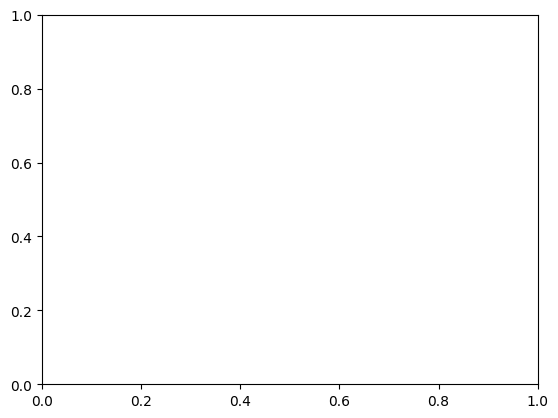

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Definir los límites de las fases
x_phase_prepare = {
    'new_view': 0,
    'center': 1,
    'msg': 2,
    'end': 3
}

x_phase_precommit = {
    'prepare_vote': 4,
    'msg': 5,
    'end': 6
}

x_phase_commit = {
    'precommit_vote': 7,
    'msg': 8,
    'end': 9
}

x_phase_decide = {
    'commit_vote': 10,
    'msg': 11,
    'end': 12
}

# Crear una red en forma de estrella
G = nx.Graph()

G.add_nodes_from([
    ('Prepare 1', {'pos': (x_phase_prepare['new_view'], 0)}),
    ('Prepare 2', {'pos': (x_phase_prepare['center'], 0)}),
    ('Prepare 3', {'pos': (x_phase_prepare['msg'], 0)}),
    ('Prepare 4', {'pos': (x_phase_prepare['end'], 0)}),
    ('Pre-Commit 1', {'pos': (x_phase_precommit['prepare_vote'], 0)}),
    ('Pre-Commit 2', {'pos': (x_phase_precommit['msg'], 0)}),
    ('Pre-Commit 3', {'pos': (x_phase_precommit['end'], 0)}),
    ('Commit 1', {'pos': (x_phase_commit['precommit_vote'], 0)}),
    ('Commit 2', {'pos': (x_phase_commit['msg'], 0)}),
    ('Commit 3', {'pos': (x_phase_commit['end'], 0)}),
    ('Decide 1', {'pos': (x_phase_decide['commit_vote'], 0)}),
    ('Decide 2', {'pos': (x_phase_decide['msg'], 0)}),
    ('Decide 3', {'pos': (x_phase_decide['end'], 0)}),
])

# Definir los nodos de cada fase
nodes_prepare = ['Prepare 1', 'Prepare 2', 'Prepare 3', 'Prepare 4']
nodes_precommit = ['Pre-Commit 1', 'Pre-Commit 2', 'Pre-Commit 3']
nodes_commit = ['Commit 1', 'Commit 2', 'Commit 3']
nodes_decide = ['Decide 1', 'Decide 2', 'Decide 3']

# Definir la posición de cada nodo
pos_prepare = nx.get_node_attributes(G, 'pos')
pos_precommit = nx.get_node_attributes(G, 'pos')
pos_commit = nx.get_node_attributes(G, 'pos')
pos_decide = nx.get_node_attributes(G, 'pos')

# Crear una figura y ejes
fig, ax = plt.subplots()

# Actualizar la posición de los nodos en cada fase
def update_position(phase):
    if phase == 'prepare':
        pos = pos_prepare
        nodes = nodes_prepare
    elif phase == 'precommit':
        pos = pos_precommit
        nodes = nodes_precommit
    elif phase == 'commit':
        pos = pos_commit
        nodes = nodes_commit
    elif phase == 'decide':
        pos = pos_decide
        nodes = nodes_decide
    else:
        return

    # Limpiar el gráfico
    ax.clear()

    # Dibujar los nodos y las aristas
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='b', ax=ax)
    nx.draw_networkx_edges(G, pos, ax=ax)

    # Agregar etiquetas a los nodos
    labels = {node: node.split()[0] for node in nodes}
    nx.draw_networkx_labels(G, pos, labels, ax=ax)

    # Configurar límites de los ejes y quitar ejes
    ax.set_xlim([-1, 13])
    ax.set_ylim([-1, 1])
    ax.axvline(x=x_phase_prepare['end'], color='gray', linestyle='--')
    ax.axvline(x=x_phase_precommit['end'], color='gray', linestyle='--')
    ax.axvline(x=x_phase_commit['end'], color='gray', linestyle='--')
    ax.axvline(x=x_phase_decide['end'], color='gray', linestyle='--')
    ax.axis('off')

# Función de animación
def animate(i):
    if i < 25:
        phase = 'prepare'
    elif i < 50:
        phase = 'precommit'
    elif i < 75:
        phase = 'commit'
    else:
        phase = 'decide'

    update_position(phase)

# Crear la animación
animation = FuncAnimation(fig, animate, frames=100, interval=200)
plt.show()

# Mostrar la animación en Colab
HTML(animation.to_jshtml())
